# Aerial Lanscape Classification with TensorFlow
## Dataset Overview:
Name: Skyview Multi-Landscape Aerial Imagery Dataset

Categories:

Agriculture
Airport
Beach
City
Desert
Forest
Grassland
Highway
Lake
Mountain
Parking
Port
Railway
Residential
River
Image Resolution: 256x256 pixels

Number of Images per Category: 800

Total Images: 12,000

Sources:

AID Dataset: https://captain-whu.github.io/AID/

NWPU-Resisc45 Dataset: https://paperswithcode.com/dataset/resisc45

Description:
Skyview is a curated dataset for aerial landscape classification featuring 15 diverse categories, each comprising 800 high-quality images at a resolution of 256x256 pixels. This dataset is a fusion of images sourced from the publicly available AID and NWPU-Resisc45 datasets. The compilation is designed to facilitate research and development in the field of computer vision, particularly in the context of aerial landscape analysis.

Researchers and developers are encouraged to explore and utilize Skyview, giving due credit to the original contributors of the AID and NWPU-Resisc45 datasets.

From: https://www.kaggle.com/datasets/ankit1743/skyview-an-aerial-landscape-dataset/data

In [1]:
#Librarys
from PIL import Image
import numpy as np
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
img= Image.open("Aer_lans_Data/test/Agriculture/Agriculture.600.jpg")
width, height = img.size
print("The width of the image is: ",width,"and the height is: ", height)

The width of the image is:  256 and the height is:  256


In [3]:
base_dir="Aer_lans_Data"
train_dir="Aer_lans_Data/train"
test_dir="Aer_lans_Data/test"
validation_dir="Aer_lans_Data/validation"

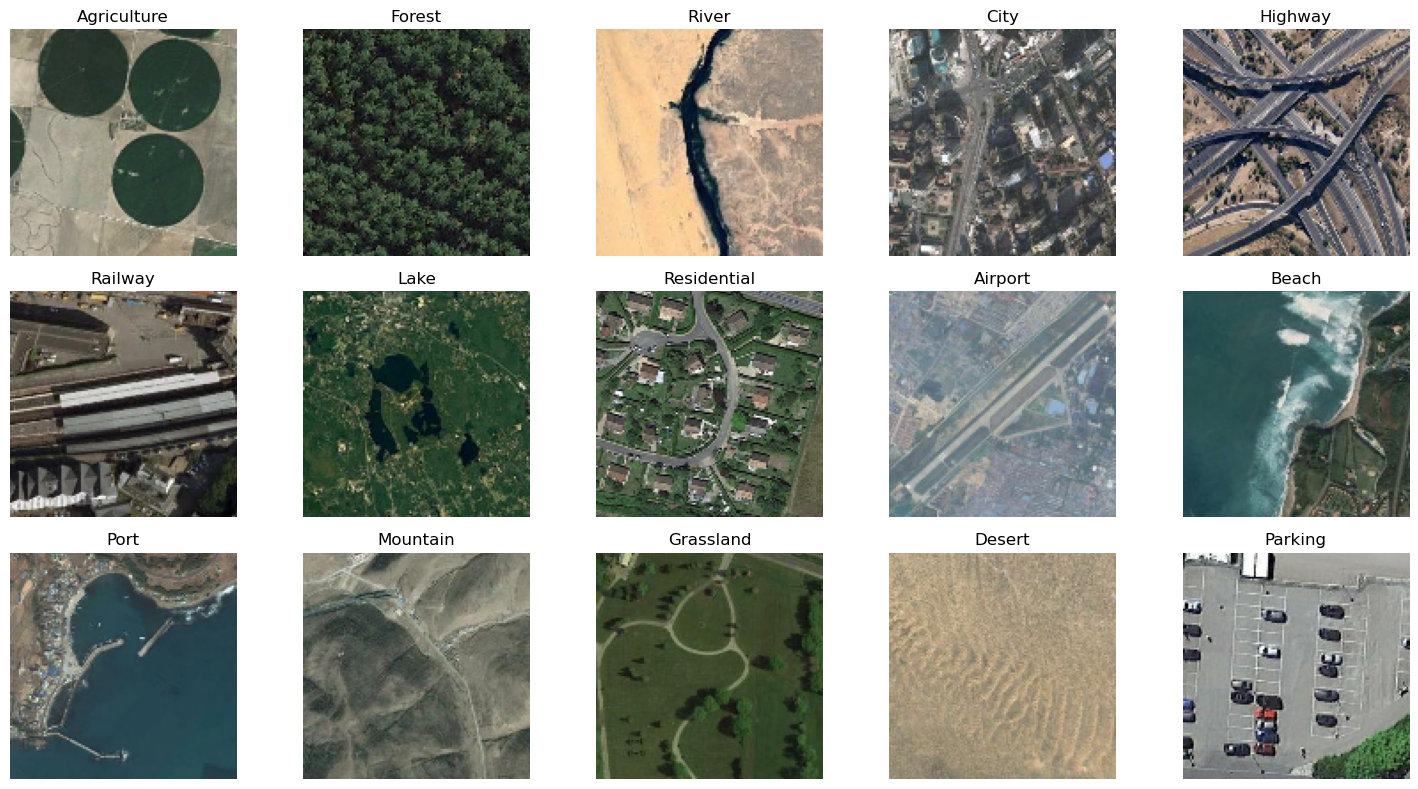

In [4]:
# Obtener nombres de las clases (nombres de las subcarpetas)
clases = [clase for clase in os.listdir(train_dir) if not clase.startswith('.DS_Store')]

# Crear figura
fig = plt.figure(figsize=(15, 8))

# Iterar sobre cada clase
for i, clase in enumerate(clases):
    # Obtener una imagen aleatoria de la clase
    images_path = os.path.join(train_dir, clase)
    image_files = [os.path.join(images_path, fname) for fname in os.listdir(images_path)]
    random_image_path = random.choice(image_files)
    
    # Cargar y mostrar la imagen
    img = image.load_img(random_image_path, target_size=(128, 128))
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(img)
    ax.set_title(clase)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Configurar generadores de imágenes
train_datagen = ImageDataGenerator(    
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)  
validation_datagen = ImageDataGenerator(rescale=1./255)# Normalización de píxeles
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Configurar generadores de flujo desde directorio
batch_size = 32
target_size = (64, 64)  # Tamaño al que se redimensionarán las imágenes

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')  # Utilizamos class_mode='categorical' porque hay varias clases

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 6000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [8]:
class_indices = train_generator.class_indices

# Imprimir las categorías y sus índices
print(class_indices)

{'Agriculture': 0, 'Airport': 1, 'Beach': 2, 'City': 3, 'Desert': 4, 'Forest': 5, 'Grassland': 6, 'Highway': 7, 'Lake': 8, 'Mountain': 9, 'Parking': 10, 'Port': 11, 'Railway': 12, 'Residential': 13, 'River': 14}


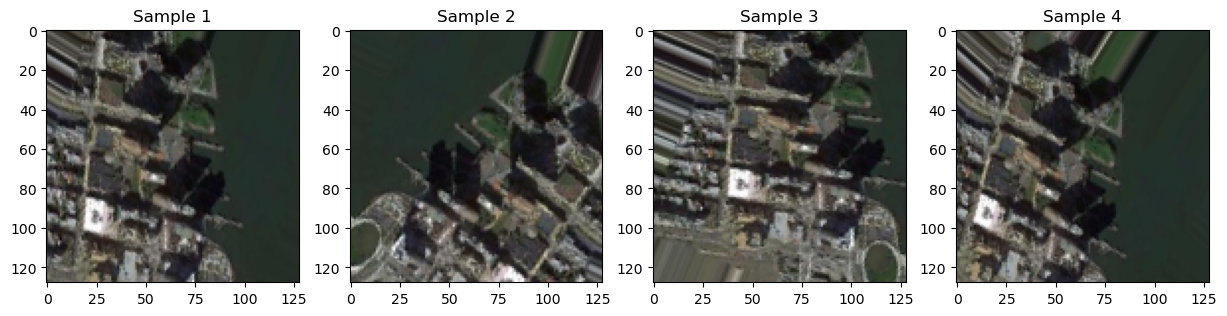

In [9]:
# Obtener nombres de archivo de muestras de la categoría 'City'
fnames = [os.path.join(train_dir, 'City', fname) for fname in os.listdir(os.path.join(train_dir, 'City'))]

# Cargar una imagen de ejemplo
img_path = fnames[3] 
img = image.load_img(img_path, target_size=(128, 128))

# Convertir la imagen a un arreglo y expandir su dimensión
x = image.img_to_array(img) 
x = x.reshape((1,) + x.shape) 

# Mostrar las primeras 4 muestras de imágenes
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, batch in enumerate(train_datagen.flow(x, batch_size=1)):
    axs[i].imshow(image.array_to_img(batch[0]))
    axs[i].set_title(f'Sample {i+1}')
    if i == 3:
        break
plt.show()

# Create a CNN

In [10]:
'''
model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(64,64,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    #layers.BatchNormalization(),
    #layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])
'''


"\nmodel = tf.keras.models.Sequential([\n    layers.Conv2D(64, (3, 3), input_shape=(64,64,3), activation='relu'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Dropout(0.2),\n    layers.Conv2D(128, (3, 3), activation='relu'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Conv2D(256, (3, 3), activation='relu'),\n    #layers.BatchNormalization(),\n    #layers.MaxPooling2D((2, 2)),\n    layers.Dropout(0.2),\n    layers.Conv2D(128, (3, 3), activation='relu'),\n    layers.BatchNormalization(),\n    layers.MaxPooling2D((2, 2)),\n    layers.Dropout(0.2),\n    tf.keras.layers.Flatten(),\n    layers.Dense(512, activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.Dropout(0.2),\n    tf.keras.layers.Dense(15, activation='softmax')\n])\n"

In [11]:
'''
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
'''

"\n# Compilar el modelo\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\nmodel.summary()\n"

In [12]:
'''
#Early stopping
early_stopping = callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=5, mode='max', verbose=1)
'''

"\n#Early stopping\nearly_stopping = callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=5, mode='max', verbose=1)\n"

# Train

In [13]:
'''
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      #validation_steps=50,
      callbacks=[early_stopping])
      '''

'\nhistory = model.fit_generator(\n      train_generator,\n      steps_per_epoch=100,\n      epochs=100,\n      validation_data=validation_generator,\n      #validation_steps=50,\n      callbacks=[early_stopping])\n      '

In [14]:
'''
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
'''

'\npd.DataFrame(history.history)[[\'accuracy\',\'val_accuracy\']].plot()\nplt.title("Accuracy")\nplt.show()\n'

# Evaluation

In [15]:
'''
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Accuracy on test data: {test_accuracy}')

# Generar predicciones para el conjunto de datos de prueba
Ypred = model.predict(test_generator)
Ypred_classes = np.argmax(Ypred, axis=1)

# Obtener las imágenes y etiquetas verdaderas del generador de datos de prueba
X_test, y_test = next(test_generator)'''


"\n# Evaluar el modelo en el conjunto de datos de prueba\ntest_loss, test_accuracy = model.evaluate(test_generator)\nprint(f'Accuracy on test data: {test_accuracy}')\n\n# Generar predicciones para el conjunto de datos de prueba\nYpred = model.predict(test_generator)\nYpred_classes = np.argmax(Ypred, axis=1)\n\n# Obtener las imágenes y etiquetas verdaderas del generador de datos de prueba\nX_test, y_test = next(test_generator)"

In [16]:
'''
# Inicializar listas para almacenar todas las imágenes y etiquetas verdaderas del conjunto de datos de prueba
all_images = []
all_labels = []

# Iterar sobre los lotes del generador de datos de prueba
for i in range(len(test_generator)):
    X_batch, y_batch = next(test_generator)
    all_images.extend(X_batch)
    all_labels.extend(y_batch)

# Convertir las listas en matrices numpy
X_t = np.array(all_images)
y_t = np.array(all_labels)


# Convertir y_test al formato de clases directas
y_test_classes = np.argmax(y_t, axis=1)

# Calcular la matriz de confusión
cm_nn = confusion_matrix(y_true=y_test_classes, y_pred=Ypred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()
plt.title("Matriz de confusión")
plt.show()'''

'\n# Inicializar listas para almacenar todas las imágenes y etiquetas verdaderas del conjunto de datos de prueba\nall_images = []\nall_labels = []\n\n# Iterar sobre los lotes del generador de datos de prueba\nfor i in range(len(test_generator)):\n    X_batch, y_batch = next(test_generator)\n    all_images.extend(X_batch)\n    all_labels.extend(y_batch)\n\n# Convertir las listas en matrices numpy\nX_t = np.array(all_images)\ny_t = np.array(all_labels)\n\n\n# Convertir y_test al formato de clases directas\ny_test_classes = np.argmax(y_t, axis=1)\n\n# Calcular la matriz de confusión\ncm_nn = confusion_matrix(y_true=y_test_classes, y_pred=Ypred_classes)\n\n# Mostrar la matriz de confusión\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)\ndisp.plot()\nplt.title("Matriz de confusión")\nplt.show()'

In [17]:
'''
# Definir labels
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

# Mostrar las imágenes con sus etiquetas verdaderas y predichas
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flip(X_test[i], axis=-1))  # Utiliza X_test en lugar de plt.imread(test_df.Filepath.iloc[i])
    true_label = labels[np.argmax(y_test[i])]  # Convertir la etiqueta a una cadena
    predicted_label = labels[Ypred_classes[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()'''

'\n# Definir labels\nlabels = train_generator.class_indices\nlabels = {v: k for k, v in labels.items()}\n\n# Mostrar las imágenes con sus etiquetas verdaderas y predichas\nfig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),\n                        subplot_kw={\'xticks\': [], \'yticks\': []})\n\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(np.flip(X_test[i], axis=-1))  # Utiliza X_test en lugar de plt.imread(test_df.Filepath.iloc[i])\n    true_label = labels[np.argmax(y_test[i])]  # Convertir la etiqueta a una cadena\n    predicted_label = labels[Ypred_classes[i]]\n    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")\n\nplt.tight_layout()\nplt.show()'

# VGG16 convolutional base

In [18]:
early_stopping = callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=5, mode='max', verbose=1)

In [19]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

2024-05-11 15:59:33.260385: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-05-11 15:59:33.260409: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-11 15:59:33.260417: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-11 15:59:33.260453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-11 15:59:33.260469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(15, activation='sigmoid'))


In [21]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 15243087 (58.15 MB)
Trainable params: 15243087 (58.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [23]:
history = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,callbacks=[early_stopping])

Epoch 1/50


2024-05-11 15:59:34.092609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.2152 - accuracy: 0.3420

2024-05-11 15:59:45.785186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 13s 124ms/step - loss: 0.2152 - accuracy: 0.3420 - val_loss: 0.1679 - val_accuracy: 0.5431
Epoch 2/50
100/100 [==============================] - 12s 122ms/step - loss: 0.1417 - accuracy: 0.5891 - val_loss: 0.1249 - val_accuracy: 0.6594
Epoch 3/50
100/100 [==============================] - 12s 122ms/step - loss: 0.1179 - accuracy: 0.6750 - val_loss: 0.0925 - val_accuracy: 0.7487
Epoch 4/50
100/100 [==============================] - 12s 122ms/step - loss: 0.0987 - accuracy: 0.7272 - val_loss: 0.0789 - val_accuracy: 0.8012
Epoch 5/50
100/100 [==============================] - 12s 122ms/step - loss: 0.0872 - accuracy: 0.7669 - val_loss: 0.0690 - val_accuracy: 0.8100
Epoch 6/50
100/100 [==============================] - 12s 121ms/step - loss: 0.0805 - accuracy: 0.7839 - val_loss: 0.0599 - val_accuracy: 0.8456
Epoch 7/50
100/100 [==============================] - 12s 122ms/step - loss: 0.0718 - accuracy: 0.8116 - val_loss: 0.0616 - val_accuracy: 0.8

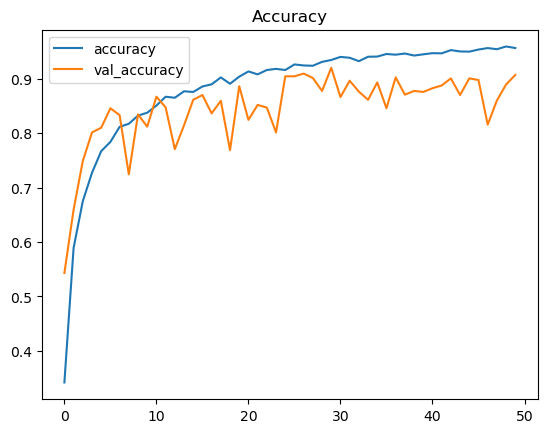

In [24]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [27]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model2.evaluate(test_generator)
print(f'Accuracy on test data: {test_accuracy}')

# Generar predicciones para el conjunto de datos de prueba
Ypred = model2.predict(test_generator)
Ypred_classes = np.argmax(Ypred, axis=1)

# Obtener las imágenes y etiquetas verdaderas del generador de datos de prueba
X_test, y_test = next(test_generator)

94/94 [==============================] - 3s 30ms/step - loss: 0.0631 - accuracy: 0.8950
Accuracy on test data: 0.8949999809265137
 4/94 [>.............................] - ETA: 1s 

2024-05-11 16:11:39.664414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 2s 25ms/step


In [29]:
model2.save('AerialLandscape.keras')

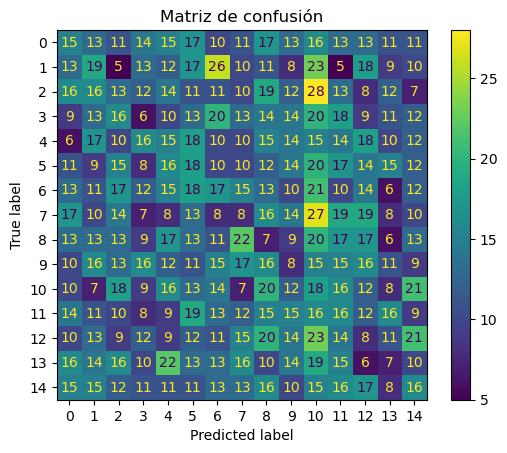

In [30]:
# Inicializar listas para almacenar todas las imágenes y etiquetas verdaderas del conjunto de datos de prueba
all_images = []
all_labels = []

# Iterar sobre los lotes del generador de datos de prueba
for i in range(len(test_generator)):
    X_batch, y_batch = next(test_generator)
    all_images.extend(X_batch)
    all_labels.extend(y_batch)

# Convertir las listas en matrices numpy
X_t = np.array(all_images)
y_t = np.array(all_labels)


# Convertir y_test al formato de clases directas
y_test_classes = np.argmax(y_t, axis=1)

# Calcular la matriz de confusión
cm_nn = confusion_matrix(y_true=y_test_classes, y_pred=Ypred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

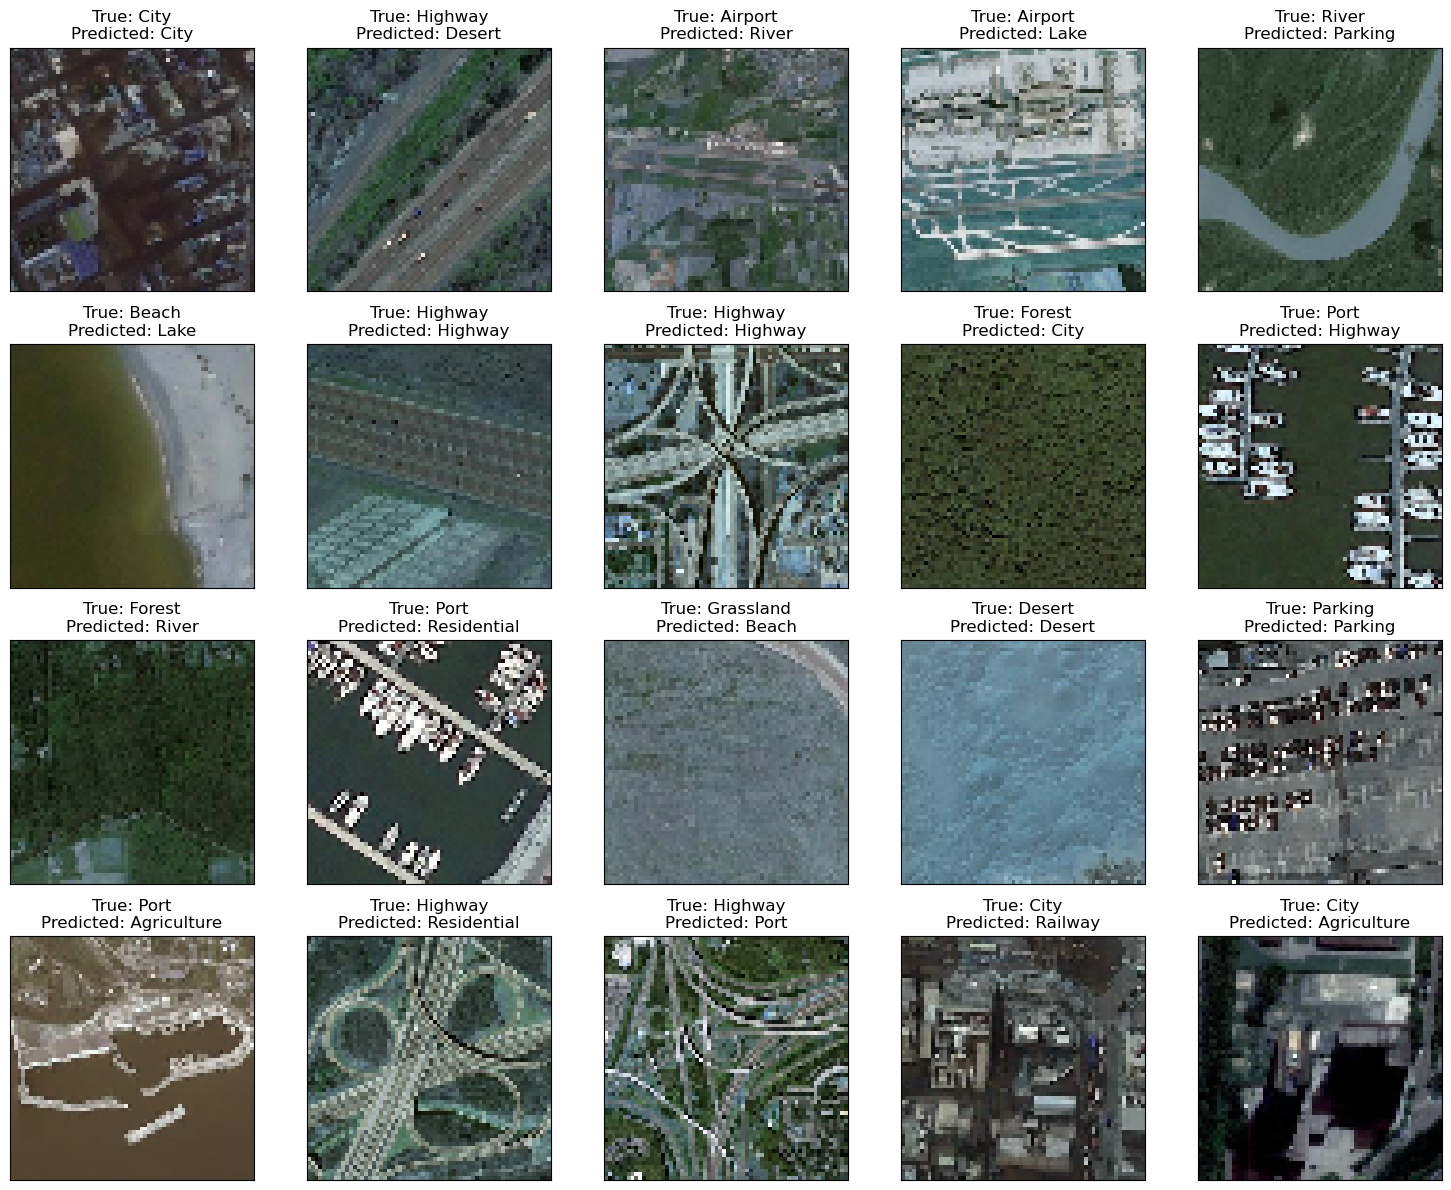

In [31]:
# Definir labels
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

# Mostrar las imágenes con sus etiquetas verdaderas y predichas
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(np.flip(X_test[i], axis=-1))  # Utiliza X_test en lugar de plt.imread(test_df.Filepath.iloc[i])
    true_label = labels[np.argmax(y_test[i])]  # Convertir la etiqueta a una cadena
    predicted_label = labels[Ypred_classes[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()